# imports

In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
len(packages),packages

(455,
 ['# packages in environment at /Users/brucecottman/anaconda3:',
  '#',
  '# Name                    Version                   Build  Channel',
  '_anaconda_depends         2019.10                  py37_0  ',
  '_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  ',
  'absl-py                   0.7.0                    pypi_0    pypi',
  'alabaster                 0.7.12                   py37_0  ',
  'altair                    4.0.0                    pypi_0    pypi',
  'anaconda                  custom                   py37_1  ',
  'anaconda-client           1.7.2                    py37_0  ',
  'anaconda-navigator        1.9.6                    py37_0  ',
  'anaconda-project          0.8.2                    py37_0  ',
  'appdirs                   1.4.3                    pypi_0    pypi',
  'appnope                   0.1.0                    py37_0  ',
  'appscript                 1.0.1            py37h1de35cc_1  ',
  'argh                      0.26.2                 

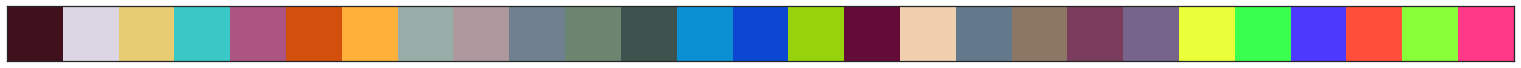

In [2]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

In [3]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
#__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', ['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']]
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']

#  function

In [4]:
from base import FutureValue_, nppy_
from base import return_fit, price_std,  price_std_f
from base import p_or_r_std, p_or_r_std_f, ticket_read
from base import register_DataFrame_method
from pandas import to_datetime, DataFrame
from statistics import stdev
from pandas_datareader.data import DataReader
from math import inf

# read

In [5]:
#!pip install pandas_datareader #if not already installed 

In [6]:
from pandas_datareader.data import DataReader

import copy

import plotly.express as px

(            MEDCPIM158SFRBCLE
 DATE                         
 1985-01-01           3.074903
 1985-02-01           5.603398,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-05-01            7.21177
 2022-06-01            7.80000)

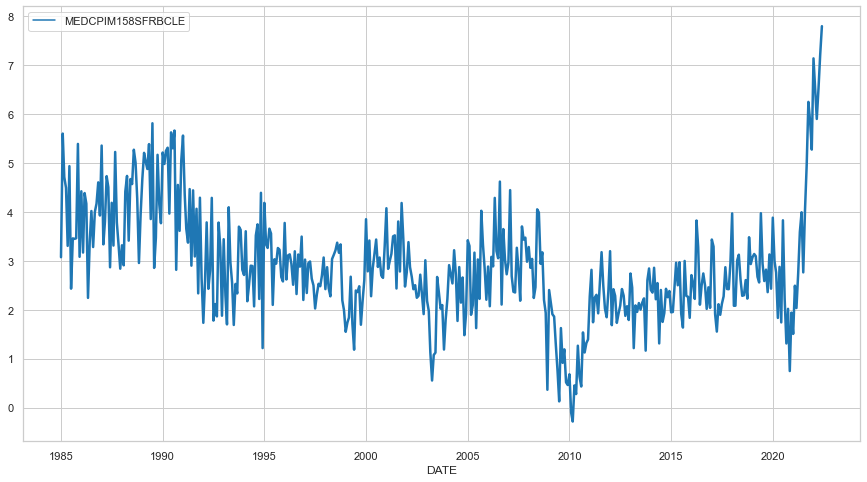

In [7]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df_monthly = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df_monthly.loc[pd.to_datetime('2022-06-01')] = [7.8]


sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df_monthly, palette="tab10", linewidth=2.5)
CPI_df_monthly.loc[pd.to_datetime('2022-06-01')] = [7.8]
CPI_df_monthly.loc[pd.to_datetime('2022-06-01')] = [7.8]
CPI_df_monthly.head(n=2), CPI_df_monthly.tail(n=2)

## 3 month  rolling average of CPI

MEDCPIM158SFRBCLE
DATE                         
2021-12-01           5.794405
2022-01-01           6.091035
2022-02-01           6.307914
2022-03-01           6.516840
2022-04-01           6.312329
2022-05-01           6.547452
2022-06-01           7.179921

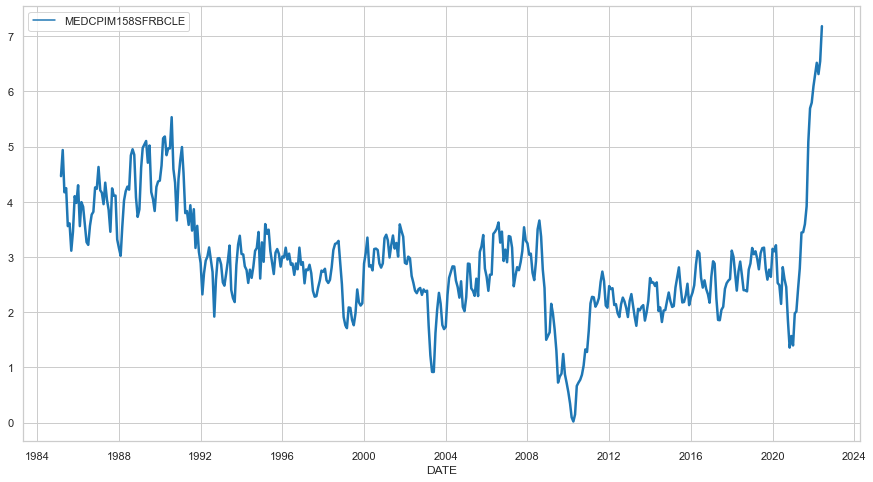

In [8]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)

CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]

window = 3
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.tail(n=7)


## 6 month  rolling average of CPI

(            MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           5.999997
 2022-03-01           6.155622
 2022-04-01           6.201682
 2022-05-01           6.427683
 2022-06-01           6.848380,
 (450, 1))

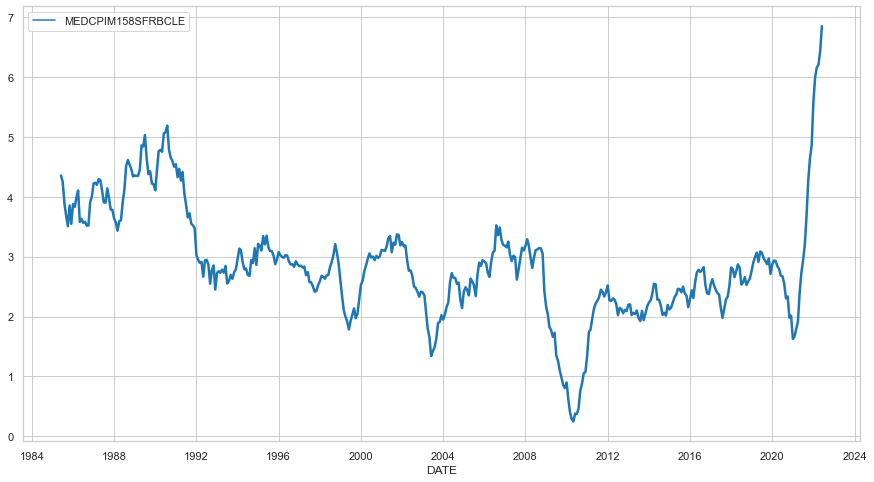

In [9]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]

window = 6
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.tail(), CPI_df.shape

## 12 month  rolling average of CPI

((450, 1),
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           4.596173
 2022-03-01           4.918412
 2022-04-01           5.233739
 2022-05-01           5.535537
 2022-06-01           5.852696)

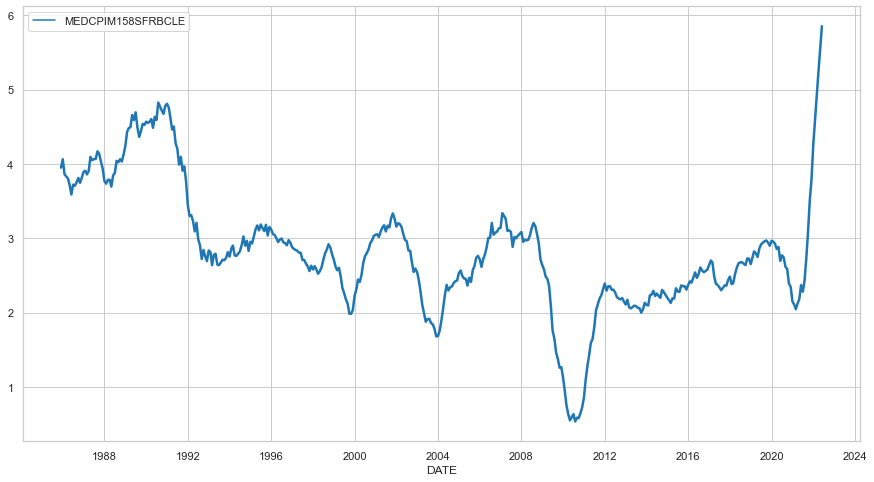

In [10]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]

window = 12
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.shape,CPI_df.tail()

## retrieve Fed rate

(            FEDFUNDS      index
 DATE                           
 1985-01-01      8.35 1985-01-01
 1985-02-01      8.50 1985-02-01
 1985-03-01      8.58 1985-03-01
 1985-04-01      8.27 1985-04-01
 1985-05-01      7.97 1985-05-01,
             FEDFUNDS      index
 DATE                           
 2022-02-01      0.08 2022-02-01
 2022-03-01      0.20 2022-03-01
 2022-04-01      0.33 2022-04-01
 2022-05-01      0.77 2022-05-01
 2022-06-01      1.21 2022-06-01)

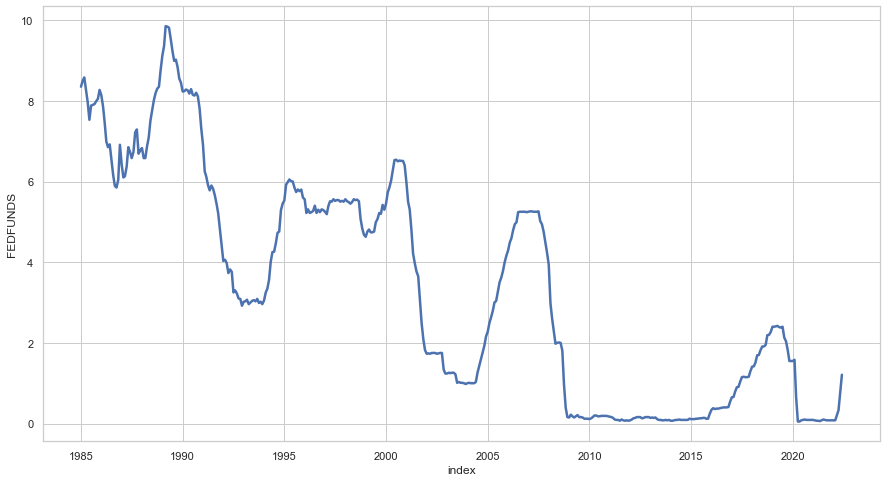

In [11]:
plt.figure(figsize=(15, 8))
ticker = 'FEDFUNDS'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'

FEDFUNDSRate_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)

FEDFUNDSRate_df['index']= FEDFUNDSRate_df.index
sns.lineplot(x='index', y=FEDFUNDSRate_df.columns[0], data=FEDFUNDSRate_df,palette="tab10", linewidth=2.5)

FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail()

# Bull and Bear market Dates

plot bars
https://datascience.stackexchange.com/questions/88588/overlaying-a-line-graph-and-an-area-graph-adding-recession-bars-to-a-time-serie

2/13/19803/27/1980118.4498.22‐17.143 11/28/19808/12/1982140.52102.42‐27.1622 10/10/19837/24/1984172.65147.82‐14.4288 8/25/198712/4/1987336.77223.92‐33.5101 1/2/19901/30/1990359.69322.98‐10.228 7/16/199010/11/1990368.95295.46‐19.987 10/7/199710/27/1997983.12876.99‐10.820 7/17/19988/31/19981186.75957.28‐19.345 7/16/199910/15/19991418.781247.41‐12.191 3/24/200010/9/20021527.46776.76‐49.1929 11/27/20023/11/2003938.87800.73‐14.7104 10/9/20073/9/20091565.15676.53‐56.8517 4/23/20107/2/20101217.281022.58‐16.070 4/29/201110/3/20111363.611099.23‐19.4157 5/21/20158/25/20152130.821867.61‐12.496 11/3/20152/11/20162109.791829.08‐13.3100 1/26/20182/8/20182872.872581.00‐10.213 9/20/201812/24/20182930.752351.10‐19.895 2/19/20203/23/20203386.152237.40‐33.933 1/3/20225/19/20224796.563900.79‐18.7136Bull
10/3/1974 11/28/198062.28140.52125.62248 
8/12/1982 8/25/1987102.42336.77228.81839 
12/4/1987 3/24/2000223.921527.46582.14494 
10/9/2002 10/9/2007776.761565.15101.51826
3/9/20092 /19/2020676.533386.15400.53999 3/23/20201/3/20222237.404796.56114.4651

Bear
2/13/1980 3/27/1980118.4498.22‐17.1 43 
11/28/1980 8/12/1982140.52102.42‐27.1622 
10/10/1983 7/24/1984172.65147.82‐14.4288 
8/25/1987 12/4/1987336.77223.92‐33.5101 
1/2/1990 1/30/1990359.69322.98‐10.228 
7/16/1990 10/11/1990368.95295.46‐19.987 
10/7/1997 10/27/1997983.12876.99‐10.820 
7/17/1998 8/31/19981186.75957.28‐19.345 
7/16/1999 10/15/19991418.781247.41‐12.191 
3/24/2000 10/9/20021527.46776.76‐49.1929 
11/27/2002 3/11/2003938.87800.73‐14.7104 
10/9/2007 3/9/20091565.15676.53‐56.8517 
4/23/2010 7/2/20101217.281022.58‐16.070 
4/29/2011 10/3/20111363.611099.23‐19.4157 
5/21/2015 8/25/20152130.821867.61‐12.496 
11/3/2015 2/11/20162109.791829.08‐13.3100 
1/26/2018 2/8/20182872.872581.00‐10.213 
9/20/2018 12/24/20182930.752351.10‐19.895 
2/19/2020 3/23/20203386.152237.40‐33.933 
1/3/20225/19/20224796.563900.79‐18.7136

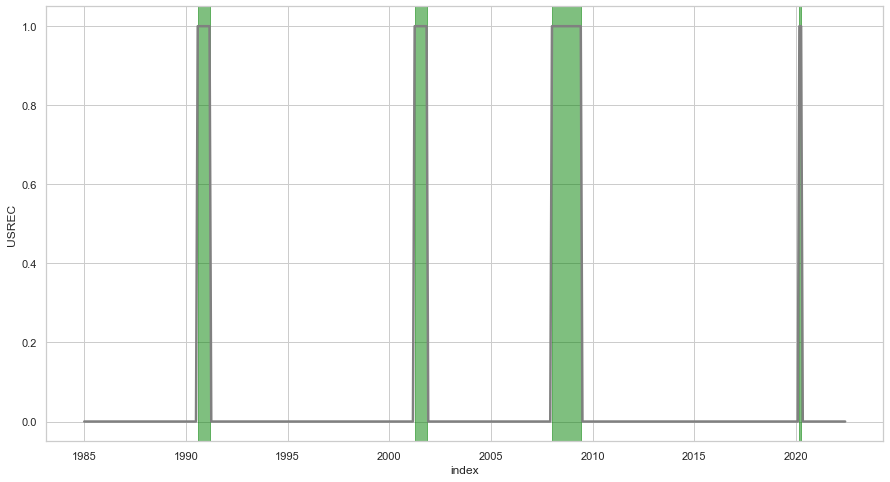

In [12]:
plt.figure(figsize=(15, 8))
ticker = 'USREC'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'

Recession_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)

Recession_df['index']= Recession_df.index
ax = sns.lineplot(x='index', y=Recession_df.columns[0], data=Recession_df,color="grey", linewidth=2.5)

threshold = 0
ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())


# CPI vs Fed rate

## 2 plot trial of rolling CPI

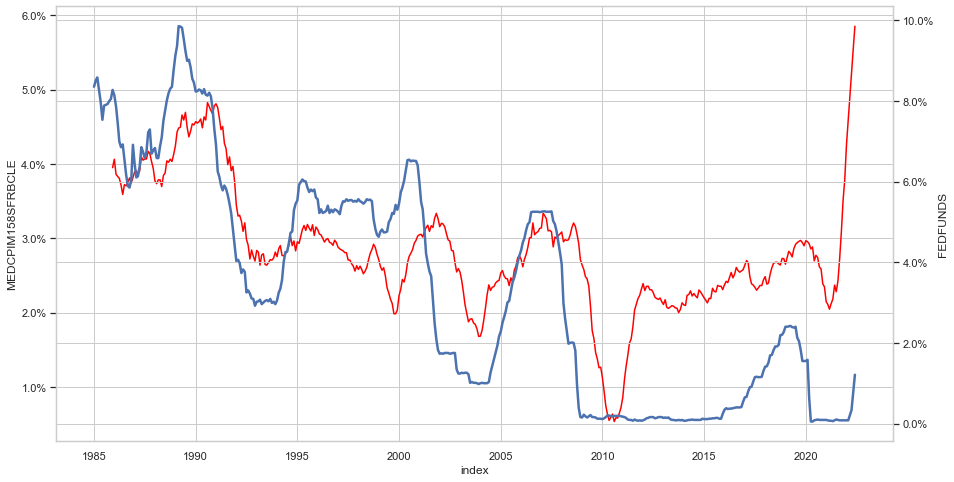

In [13]:
import matplotlib.ticker as mtick
plt.figure(figsize=(15, 8))
CPI_df['index']= CPI_df.index
ax = sns.lineplot(x='index', y=CPI_df.columns[0], color='red', data=CPI_df)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

FEDFUNDSRate_df['index']= FEDFUNDSRate_df.index
ax2 = ax.twinx()
sns.lineplot(x='index', y=FEDFUNDSRate_df.columns[0], data=FEDFUNDSRate_df,palette="tab10", linewidth=2.5, ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()


## function Recessions_plot, Fed_indexes_corr

In [14]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)

def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1/1/1960',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

##  monthy PI vs FED rate only for  to present

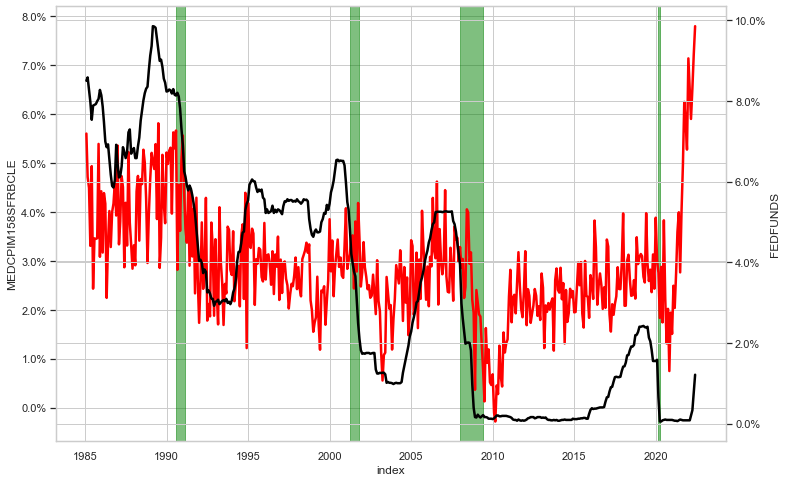

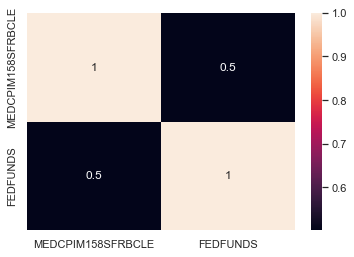

shift: 0    corr: 0.5013321100945004
shift: 0    corr: 0.5013321100945004


In [15]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df_monthly, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

##  monthy PI vs FED rate only for  to 2008

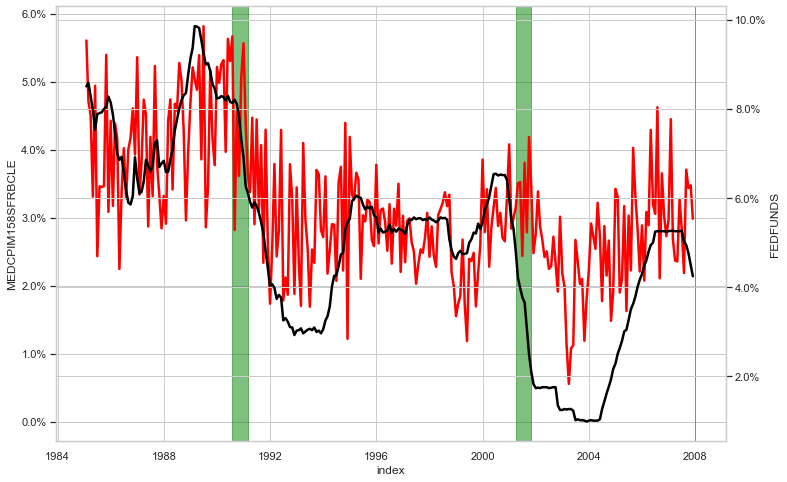

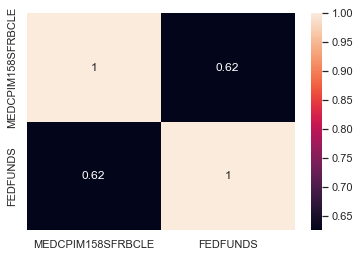

shift: 0    corr: 0.6249084935462307
shift: 0    corr: 0.6249084935462307


In [16]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df_monthly, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average CPI vs Fed rate to present

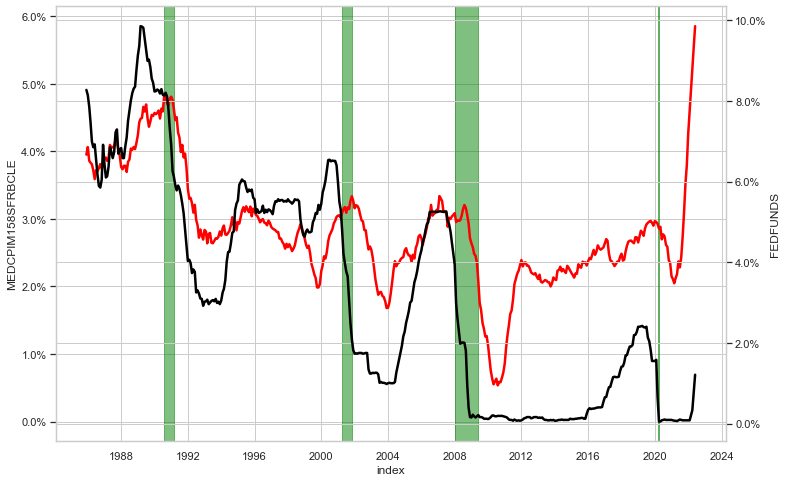

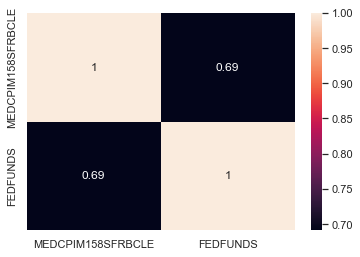

shift: 0    corr: 0.6910957022676834
shift: 0    corr: 0.6910957022676834


In [17]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average CPI vs Fed rate to 2008

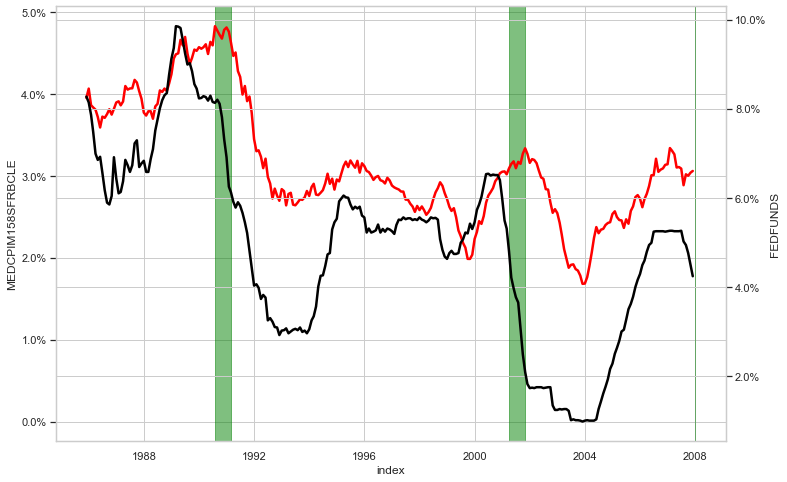

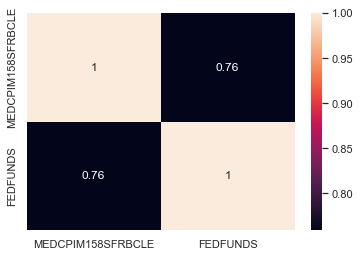

shift: 0    corr: 0.7592462336539407
shift: 0    corr: 0.7592462336539407


In [18]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

 
## FED rate only for rolling CPI to 2008

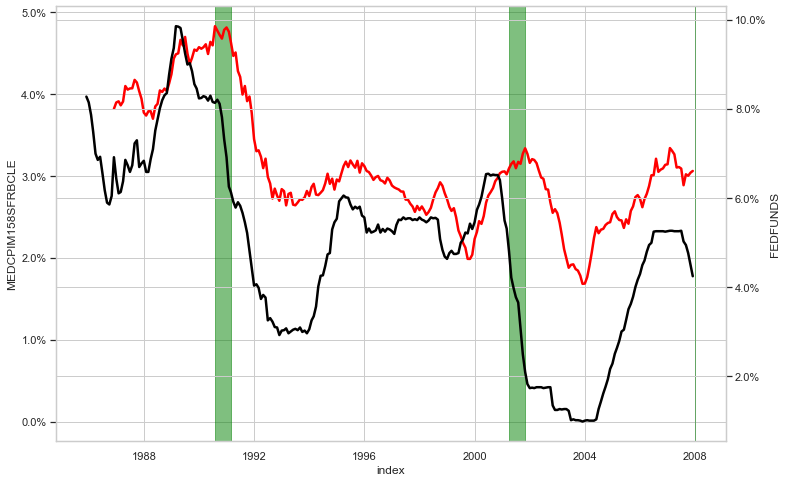

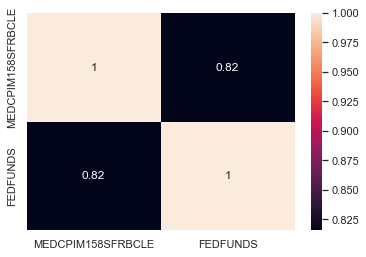

shift: -12    corr: 0.8158145685671717


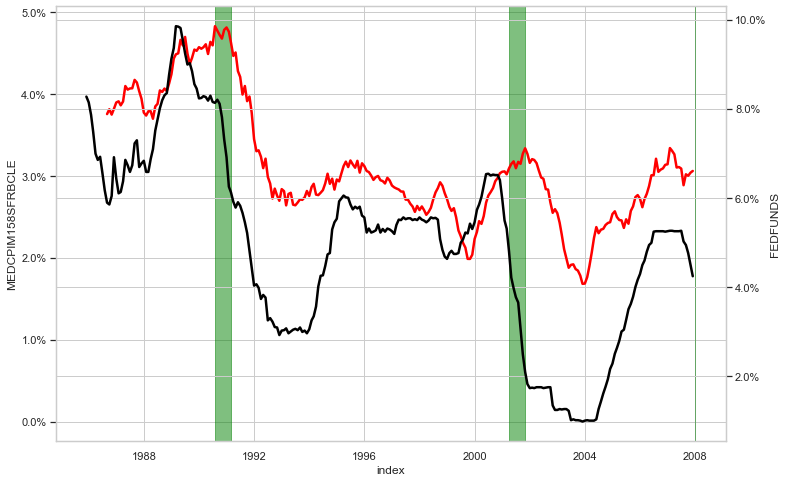

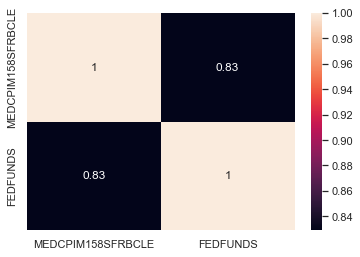

shift: -9    corr: 0.8289599658314514


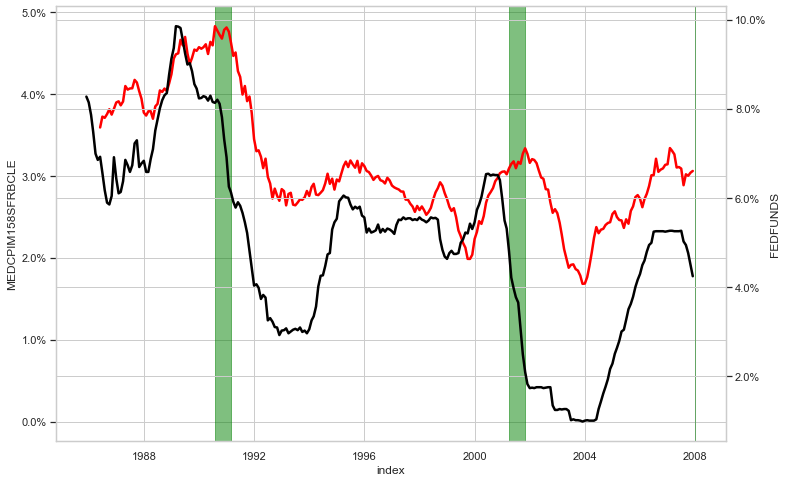

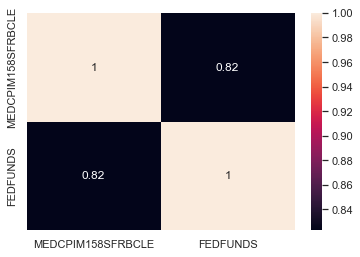

shift: -6    corr: 0.8228945911234486


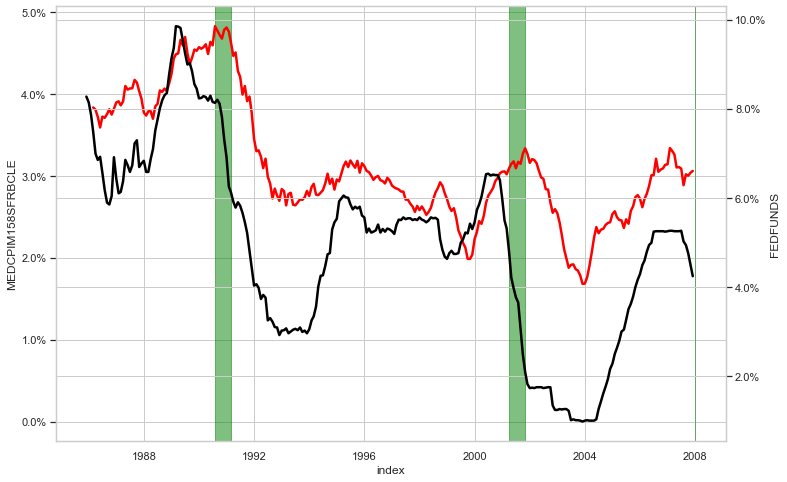

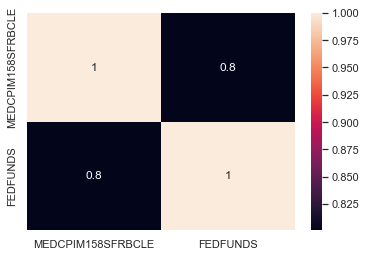

shift: -3    corr: 0.8008103335664238


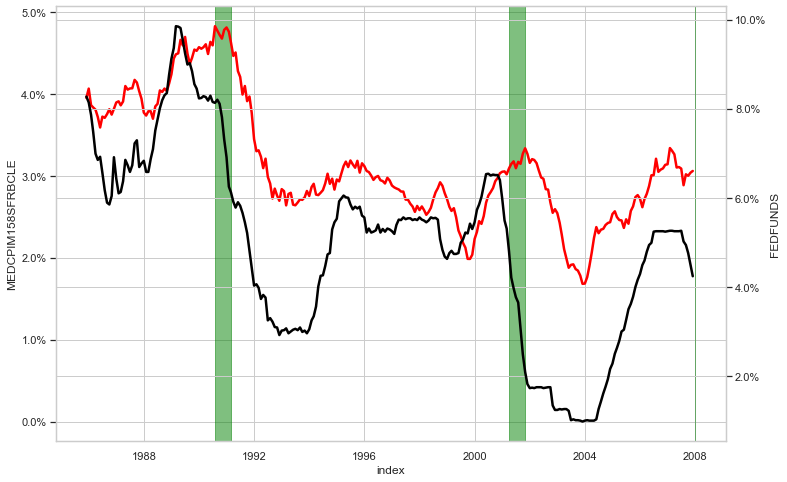

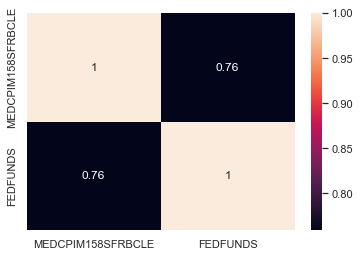

shift: 0    corr: 0.7592462336539407


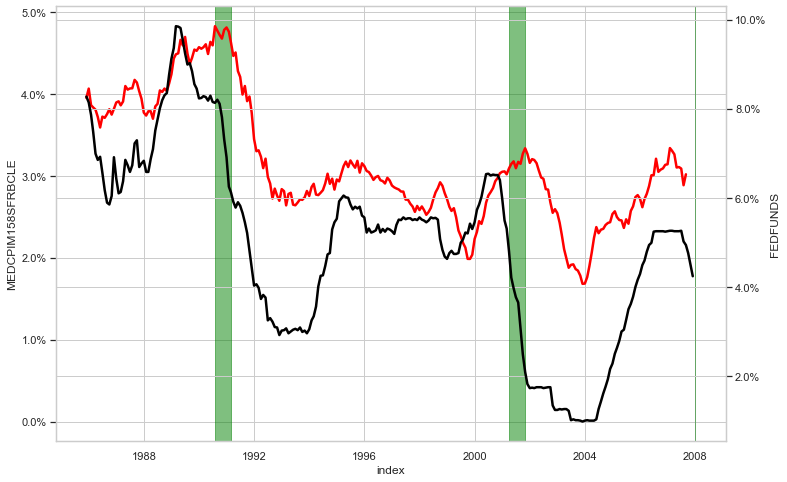

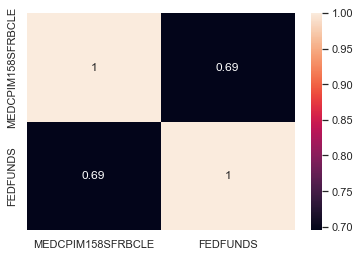

shift: 3    corr: 0.6949567268186874


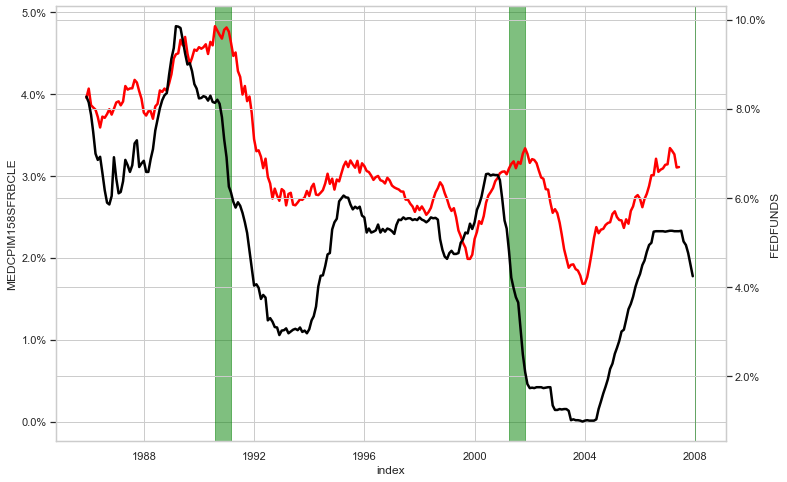

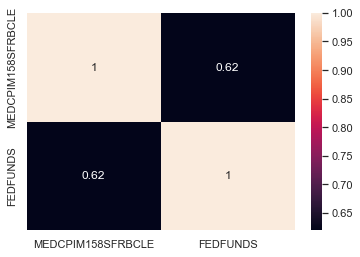

shift: 6    corr: 0.6192563170577053


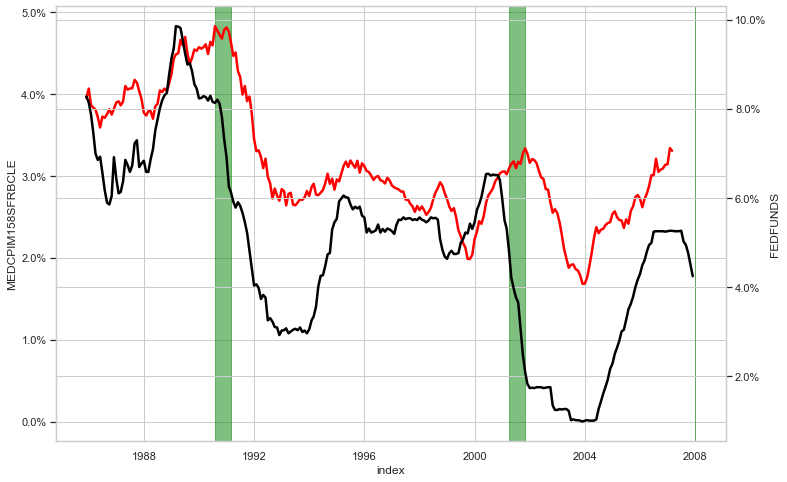

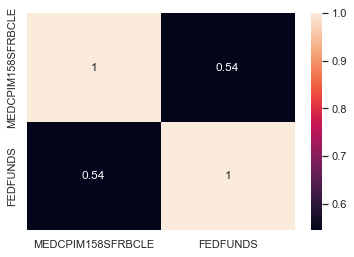

shift: 9    corr: 0.5441086698796574


In [19]:
maxsh = 0
maxcorr = 0.0
for sh in range(-12, 12, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh

# total history with 6 month rolling average CPI vs BBKMCY
maxcorr = 0.0
for sh in range(0, 6):
    hm=Inflation_CPI_two_plt(BBKMCY_df, FEDFUNDSRate_df, condition=0.0, shift= sh, bottom_year='1960-12-01',
                             top_year='2029-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve Brave-Butters-Kelley Cycle Component of GDP 

Earlier this year, a new “big data” activity index was introduced in an Economic Perspectives article.1 This index was constructed from 500 monthly measures of growth in U.S. economic activity and quarterly U.S. real GDP growth. To recap that work, the authors developed what is referred to as a mixed-frequency collapsed dynamic factor model2 that allowed for the estimation of the unobserved monthly evolution of quarterly U.S. real GDP growth based on the variation in a panel of 500 monthly time series. Included in this panel were the coincident, leading, and lagging monthly real activity indicators commonly used to assess the state of the business cycle for the United States. Using this model, the authors then decomposed monthly real GDP growth into three separate components: trend, cycle, and irregular components. The big data activity index represented the cycle component of this decomposition and was shown to have several highly desirable properties, including being 99% accurate in aligning with historical U.S. recessions and expansions as defined by the National Bureau of Economic Research (NBER) since 1960.3

## read in again MEDCPIM158SFRBCLE

<AxesSubplot:xlabel='DATE'>

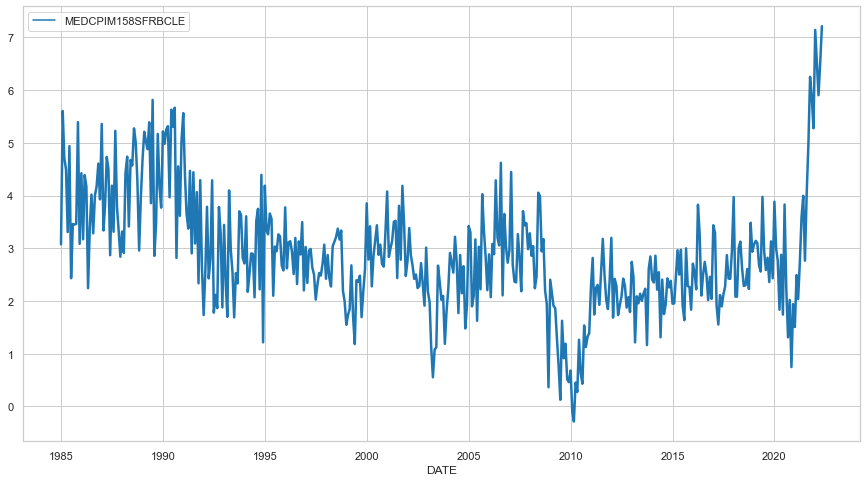

In [20]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)

## 12 month rolling average MEDCPIM158SFRBCLE

(450, 1)

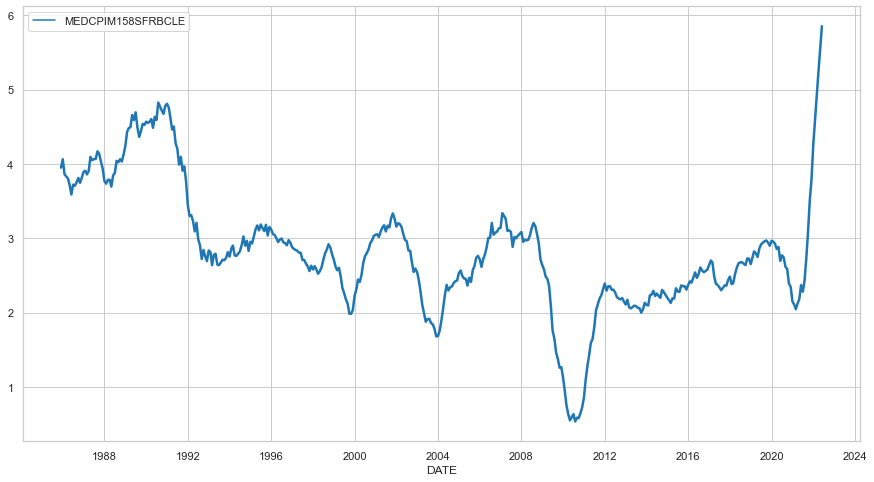

In [21]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.shape


## Read BBKMCY

BBKMCY
DATE                 
1985-01-01  -0.664751
1985-02-01   0.183190
1985-03-01   1.142127
1985-04-01  -0.195582
1985-05-01   0.445028
1985-06-01  -0.696885
1985-07-01  -0.309476
1985-08-01   1.035259
1985-09-01   0.235476
1985-10-01   0.456725
1985-11-01   0.987621
1985-12-01   0.549442
1986-01-01   1.456102
1986-02-01  -1.760437
1986-03-01  -2.437323
1986-04-01  -0.337067
1986-05-01  -0.815377
1986-06-01  -0.675609
1986-07-01   0.767743
1986-08-01  -0.172180
1986-09-01  -0.308112
1986-10-01  -0.011993
1986-11-01  -0.303167
1986-12-01   0.108268
1987-01-01  -0.164892
1987-02-01   1.563037
1987-03-01   0.180936
1987-04-01   0.877081
1987-05-01   1.457184
1987-06-01   1.320066
...               ...
2019-12-01  -3.700878
2020-01-01  -5.698211
2020-02-01  -9.830721
2020-03-01 -22.707885
2020-04-01 -38.771433
2020-05-01  -8.252359
2020-06-01   8.638849
2020-07-01  10.715806
2020-08-01   8.794691
2020-09-01   6.864559
2020-10-01   6.290146
2020-11-01   3.843229
2020-12-01   2.983799
2021-01-01   2.270742
2021-02-01   0.251752
2021-03-01   4.702061
2021-04-01   3.484175
2021-05-01   3.162101
2021-06-01   2.437155
2021-07-01   2.545677
2021-08-01   1.070761
2021-09-01   1.011407
2021-10-01   2.552676
2021-11-01   2.085135
2021-12-01   0.426950
2022-01-01  -0.744491
2022-02-01   0.419364
2022-03-01   0.836047
2022-04-01  -0.229555
2022-05-01  -0.595858

[449 rows x 1 columns]

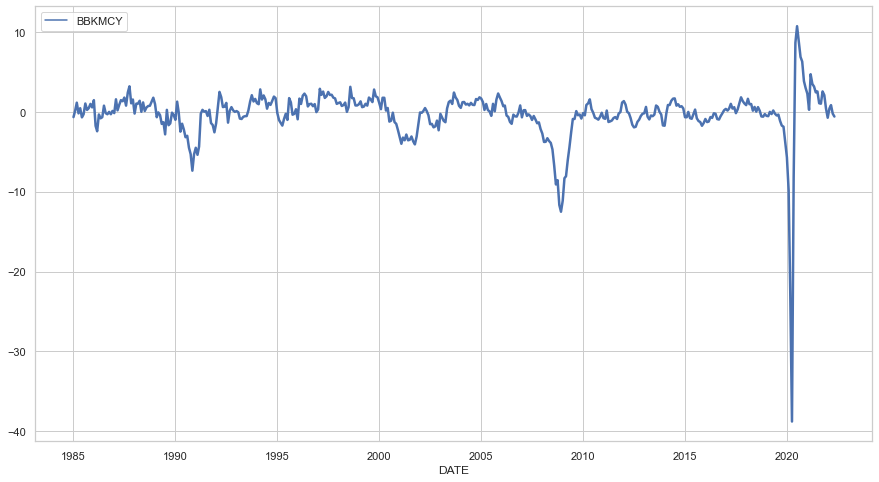

In [22]:
plt.figure(figsize=(15, 8))
ticker = 'BBKMCY'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
BBKMCY_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
sns.set_theme(style="whitegrid")
sns.lineplot(data=BBKMCY_df, color="black", linewidth=2.5)
BBKMCY_df

## 12 month rolling average BBKMCY

BBKMCY
DATE                
1985-01-01       NaN
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
1985-06-01       NaN
1985-07-01       NaN
1985-08-01       NaN
1985-09-01       NaN
1985-10-01       NaN
1985-11-01       NaN
1985-12-01  0.264015
1986-01-01  0.440752
1986-02-01  0.278783
1986-03-01 -0.019504
1986-04-01 -0.031295
1986-05-01 -0.136328
1986-06-01 -0.134555
1986-07-01 -0.044787
1986-08-01 -0.145407
1986-09-01 -0.190706
1986-10-01 -0.229766
1986-11-01 -0.337332
1986-12-01 -0.374096
1987-01-01 -0.509179
1987-02-01 -0.232223
1987-03-01 -0.014035
1987-04-01  0.087144
1987-05-01  0.276525
1987-06-01  0.442831
...              ...
2020-01-01 -1.321537
2020-02-01 -2.095270
2020-03-01 -3.986714
2020-04-01 -7.194100
2020-05-01 -7.895507
2020-06-01 -7.156070
2020-07-01 -6.224953
2020-08-01 -5.462898
2020-09-01 -4.794991
2020-10-01 -4.127259
2020-11-01 -3.651184
2020-12-01 -3.094127
2021-01-01 -2.430048
2021-02-01 -1.589842
2021-03-01  0.694320
2021-04-01  4.215621
2021-05-01  5.166826
2021-06-01  4.650018
2021-07-01  3.969174
2021-08-01  3.325513
2021-09-01  2.837751
2021-10-01  2.526295
2021-11-01  2.379787
2021-12-01  2.166716
2022-01-01  1.915447
2022-02-01  1.929414
2022-03-01  1.607247
2022-04-01  1.297769
2022-05-01  0.984606
2022-06-01  0.724009

[450 rows x 1 columns]

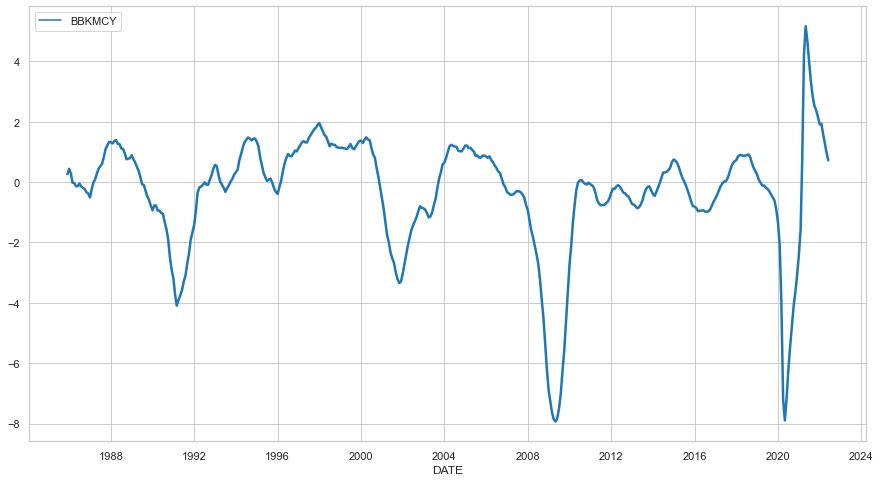

In [23]:
plt.figure(figsize=(15, 8))
ticker = 'BBKMCY'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
BBKMCY_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
BBKMCY_df.loc[pd.to_datetime('2022-06-01')] = [-0.69]
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
BBKMCY_df[BBKMCY_df.columns[0]] = BBKMCY_df[BBKMCY_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=BBKMCY_df, palette="tab10", linewidth=2.5)
BBKMCY_df

## 12 month rolling, CPI_df   vs BBKMCY

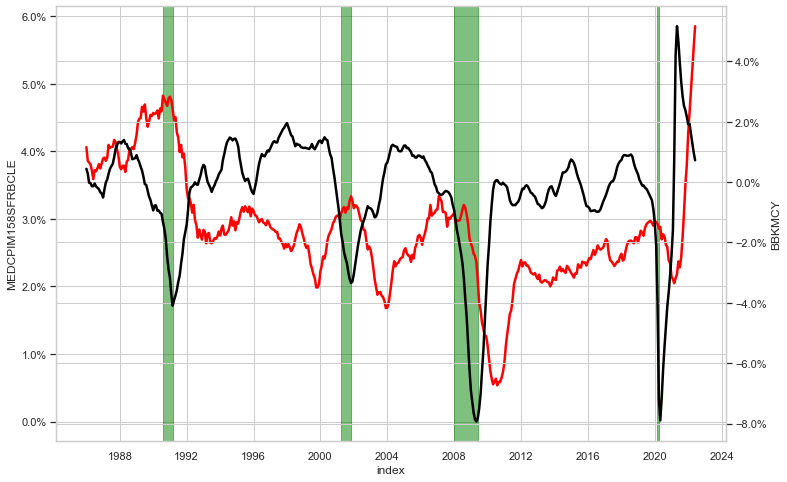

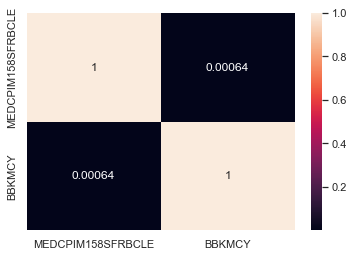

shift: 0    corr: 0.0006352808575932761
shift: 0    corr: 0.0006352808575932761


In [24]:
maxsh =  0.0 
maxcorr = -1.1
for sh in range(0, 1):
    hm=Fed_indexes_corr(CPI_df , BBKMCY_df,  shift__= sh, bottom_year='1985-12-01',
                             top_year='2029-11-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY to 2008

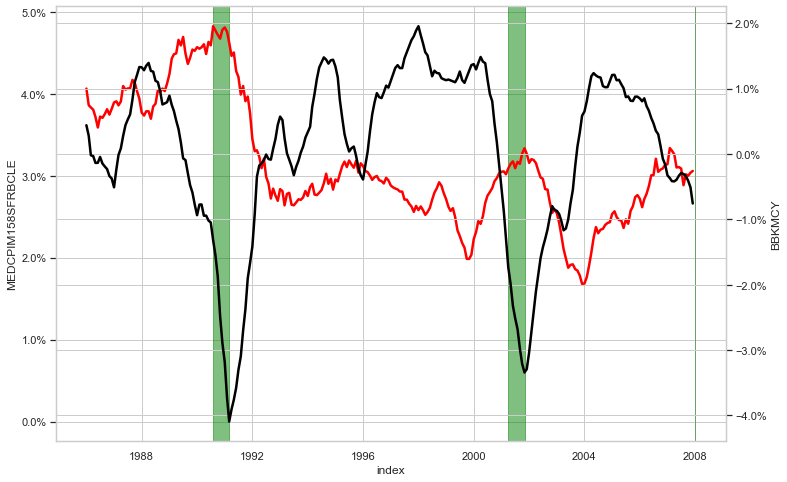

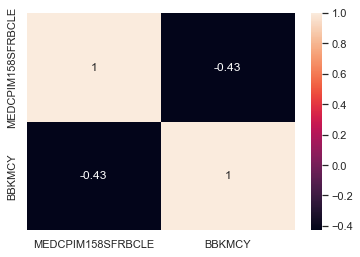

shift: 0 bb   corr: -0.4289650882994223
shift: -1.0    corr: 0.0006352808575932761


In [25]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='1985-12-01',
                             top_year='2008-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY from 2008 to 2016

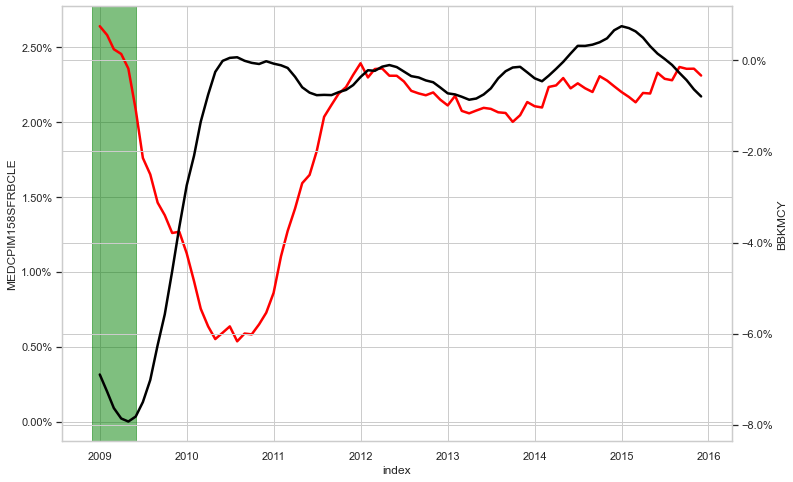

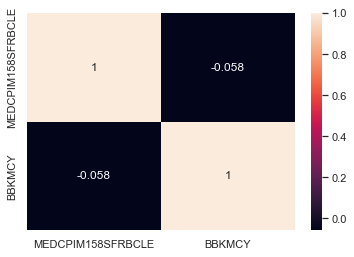

shift: 0 bb   corr: -0.05813278458171522
shift: -1.0    corr: 0.0006352808575932761


In [26]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2008-12-01',
                             top_year='2016-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

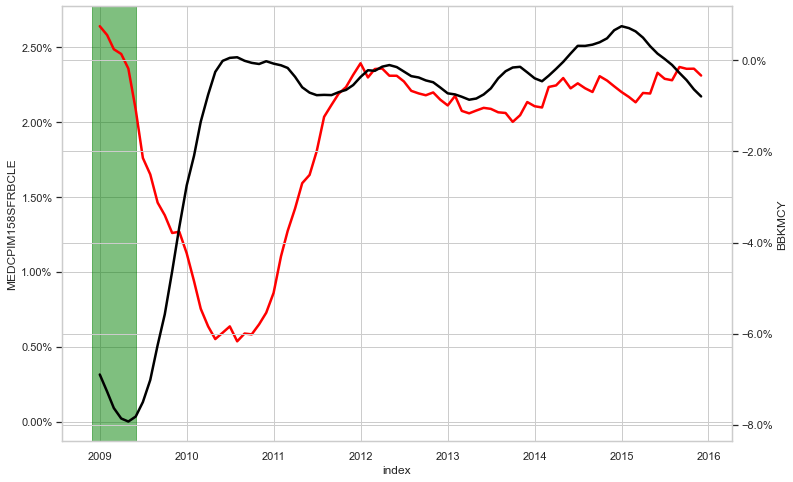

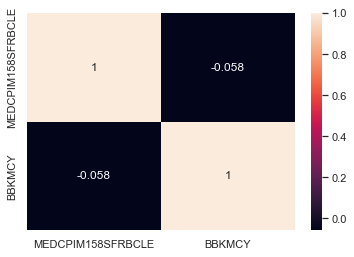

shift: 0 bb   corr: -0.05813278458171522
shift: -1.0    corr: 0.0006352808575932761


In [27]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2008-12-01',
                             top_year='2016-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY from 2016 to present

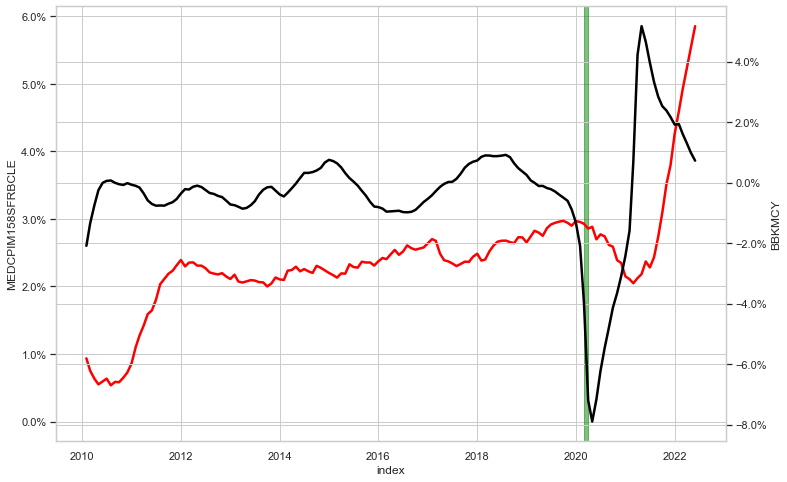

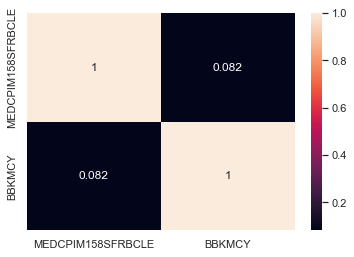

shift: 0 bb   corr: 0.08158483124563551
shift: 0    corr: 0.08158483124563551


In [28]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2010-1-01',
                             top_year='2027-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

# IXIC

(                 ^IXIC
 index                 
 1985-01-31  260.845456
 1985-02-28  285.521052
 1985-03-31  280.428574
 1985-04-30  280.895238
 1985-05-31  287.513636,
                    ^IXIC
 index                   
 2022-02-28  13898.728413
 2022-03-31  13623.262950
 2022-04-30  13394.163037
 2022-05-31  11829.729539
 2022-06-30  11418.919085)

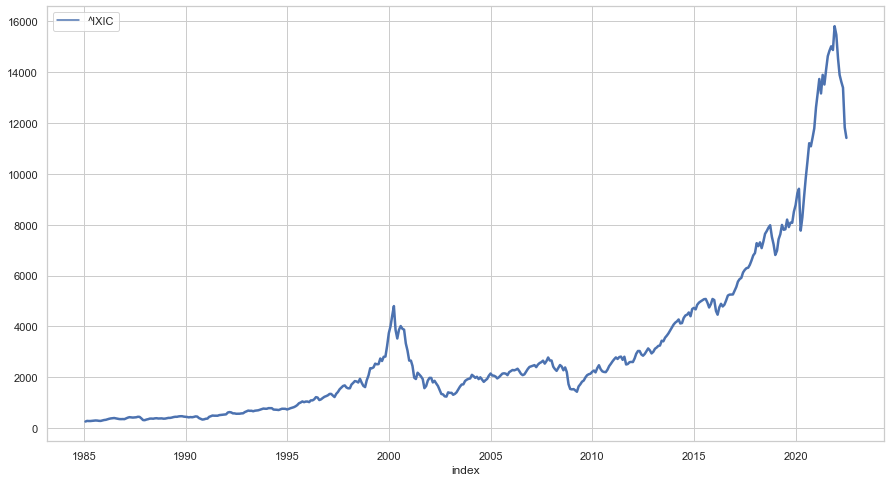

In [29]:
plt.figure(figsize=(15, 8))
ticker = '^IXIC'
rd_type = 'yahoo'
start_date = '1985/01/01' 
end_date = '2027/07/30'
Stock_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
#Stock_df[Stock_df.columns[0]] = Stock_df[Stock_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
Stock_df['index']= Stock_df.index
Stock_df.drop(['High', 'Low','Open', 'Close', 'Volume'], axis=1, inplace=True)


Stock_df = Stock_df.groupby(pd.Grouper(key='index', freq='M')).mean()
Stock_df =  Stock_df.iloc[:-1] #sns.set_theme(style="whitegrid")
Stock_df.columns = [ticker if x=='Adj Close' else x for x in Stock_df.columns]

Stock_df_save = Stock_df

sns.lineplot(data=Stock_df, color="black", linewidth=2.5)

Stock_df_save.head(), Stock_df_save.tail()

((450, 2),
             MEDCPIM158SFRBCLE      index
 DATE                                    
 2022-02-01           4.596173 2022-02-01
 2022-03-01           4.918412 2022-03-01
 2022-04-01           5.233739 2022-04-01
 2022-05-01           5.535537 2022-05-01
 2022-06-01           5.852696 2022-06-01)

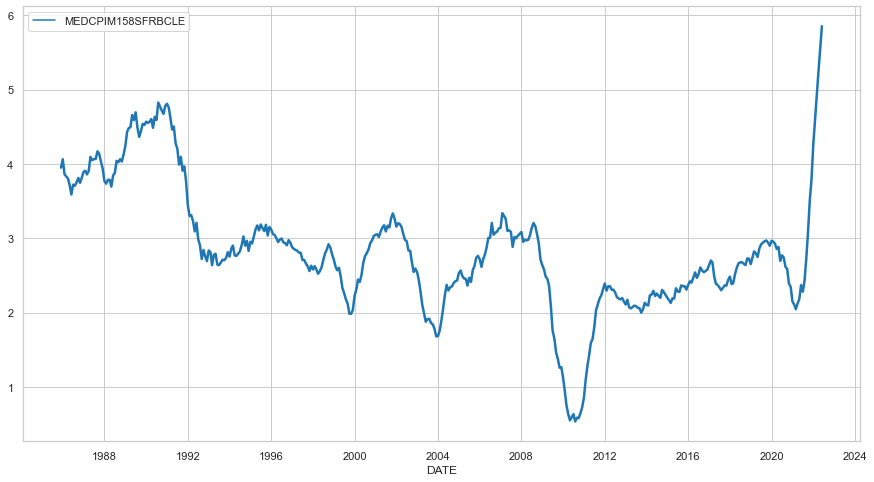

In [30]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/01/01' 
end_date = '2027/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]


window = 12
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
CPI_df['index'] = CPI_df.index
CPI_df_save = CPI_df
sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.shape,CPI_df.tail()

## 12 month rolling, CPI_df 

In [31]:
CPI_df = CPI_df_save
Stock_df = Stock_df_save
CPI_df = CPI_df.groupby(pd.Grouper(key='index', freq='M')).mean()
Stock_df_save = Stock_df
Stock_df.head(), CPI_df.head(), Stock_df.tail(), CPI_df.tail(), Stock_df.shape,  CPI_df.shape

(                 ^IXIC
 index                 
 1985-01-31  260.845456
 1985-02-28  285.521052
 1985-03-31  280.428574
 1985-04-30  280.895238
 1985-05-31  287.513636,
             MEDCPIM158SFRBCLE
 index                        
 1985-01-31                NaN
 1985-02-28                NaN
 1985-03-31                NaN
 1985-04-30                NaN
 1985-05-31                NaN,
                    ^IXIC
 index                   
 2022-02-28  13898.728413
 2022-03-31  13623.262950
 2022-04-30  13394.163037
 2022-05-31  11829.729539
 2022-06-30  11418.919085,
             MEDCPIM158SFRBCLE
 index                        
 2022-02-28           4.596173
 2022-03-31           4.918412
 2022-04-30           5.233739
 2022-05-31           5.535537
 2022-06-30           5.852696,
 (450, 1),
 (450, 1))

 ## 12 month rolling, CPI_df   vs IXIC

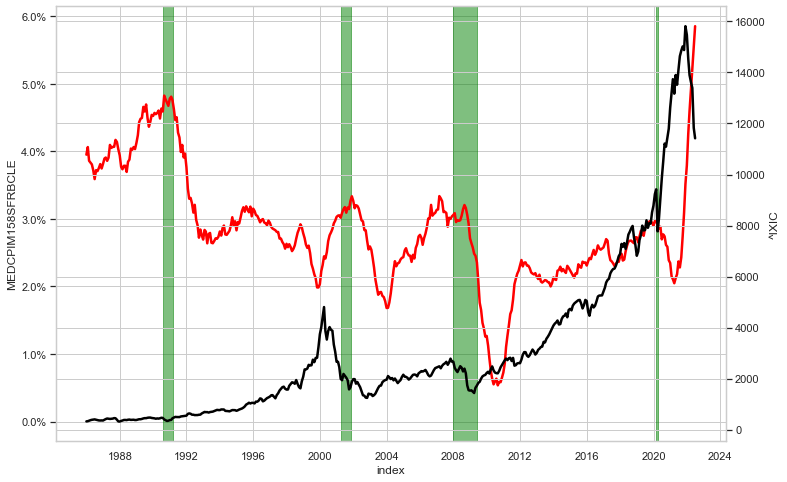

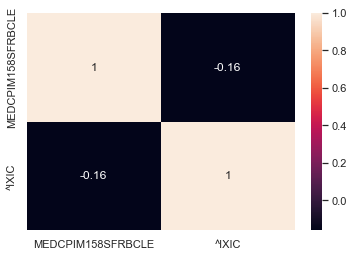

shift: 0    corr: -0.16160715623766564
shift: 0 0    corr: -0.16160715623766564 1


In [32]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)



## CPI vs IXIC to 2009

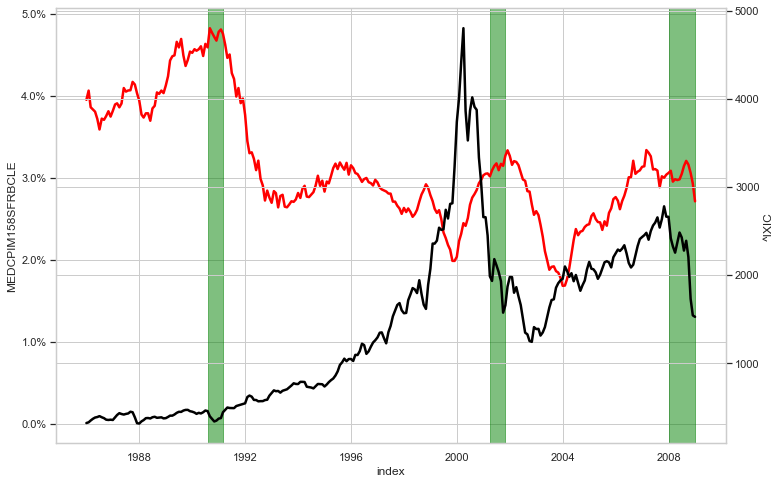

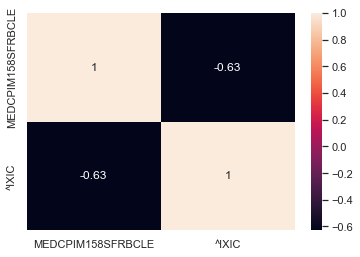

shift: -3    corr: -0.6297801563120214


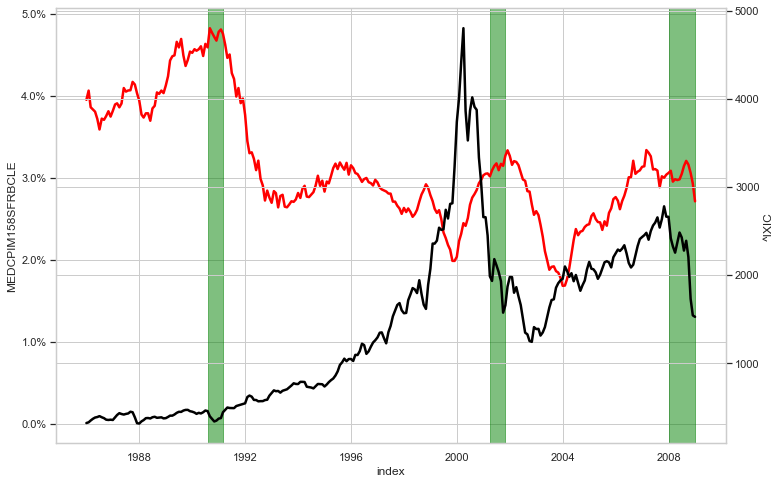

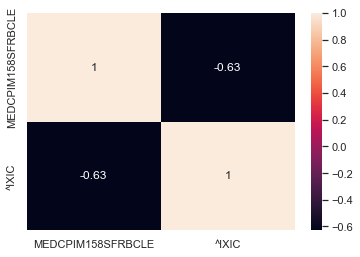

shift: -2    corr: -0.6297801563120214


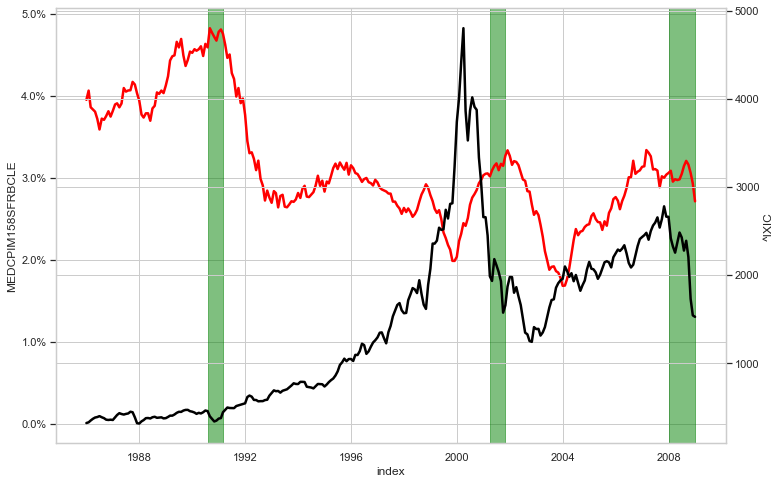

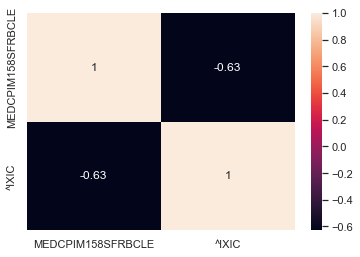

shift: -1    corr: -0.6297801563120214


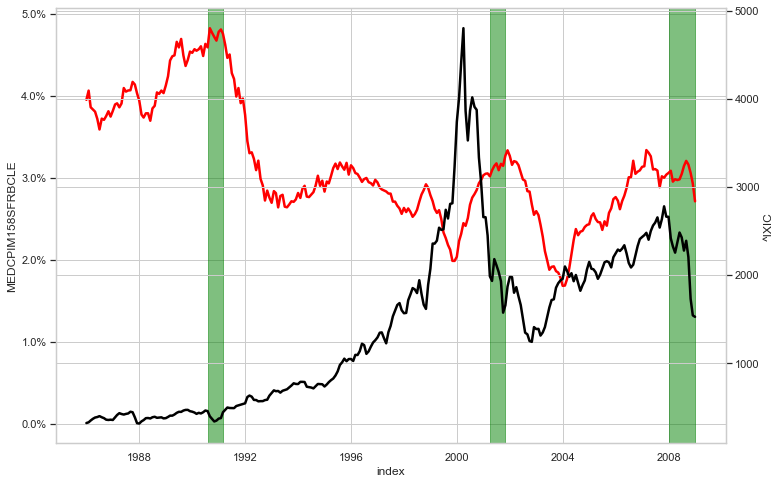

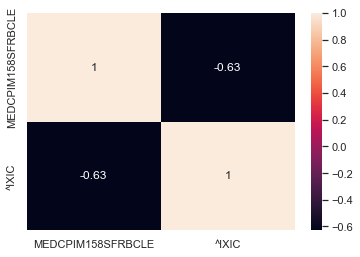

shift: 0    corr: -0.6297801563120214


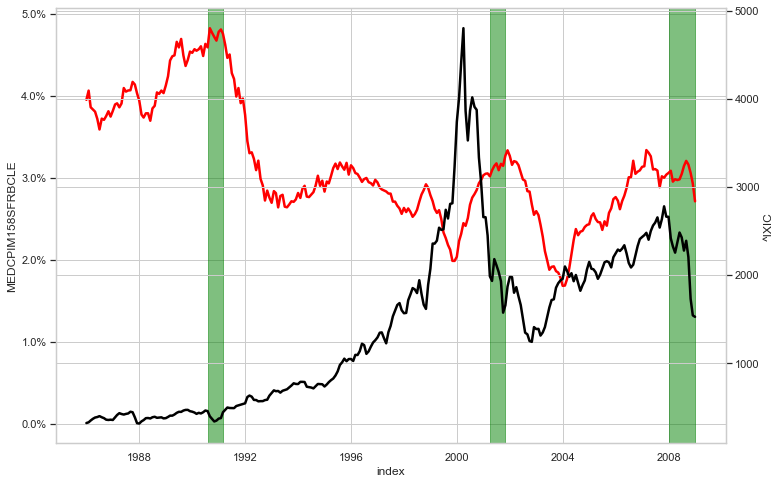

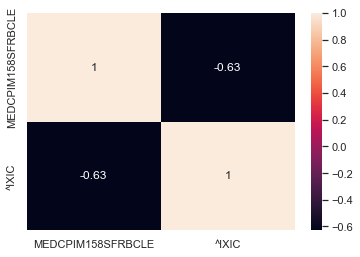

shift: 1    corr: -0.6297801563120214


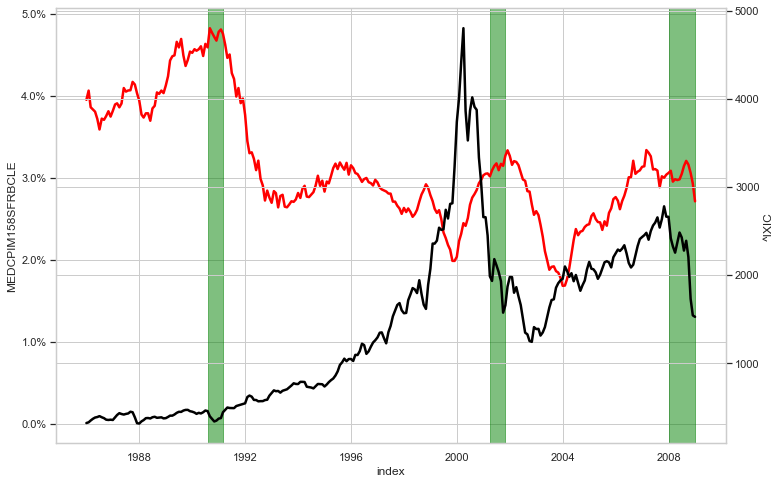

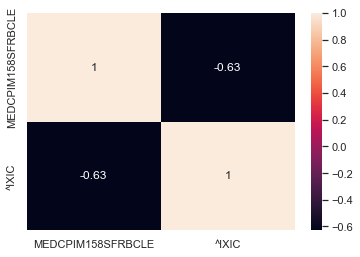

shift: 2    corr: -0.6297801563120214
shift: -1.0    corr: 0.08158483124563551


In [33]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(-3, 3, 1):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)


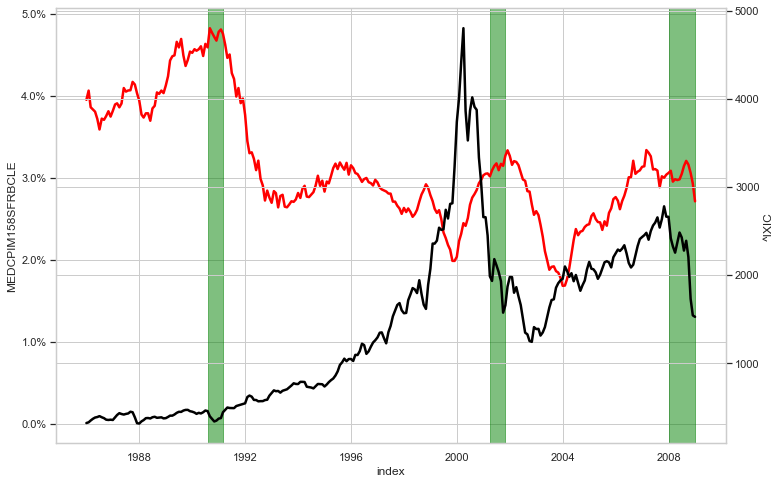

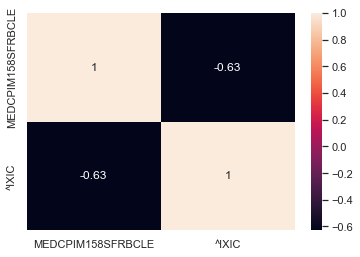

shift: -3    corr: -0.6297801563120214


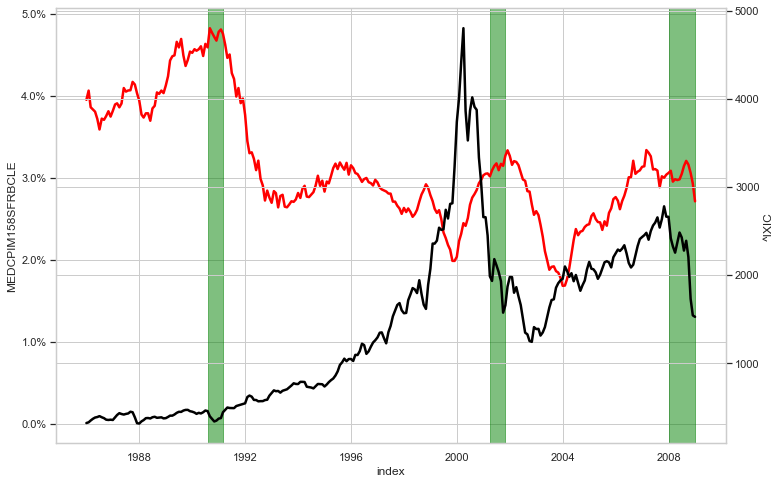

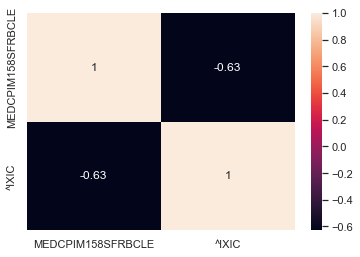

shift: -2    corr: -0.6297801563120214


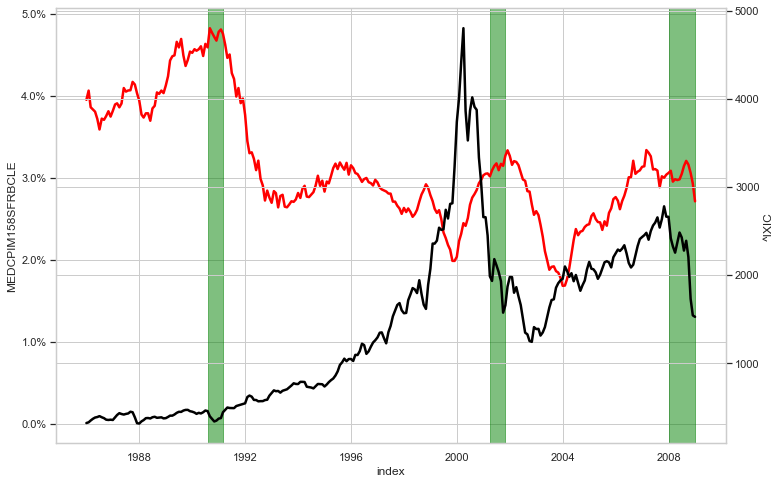

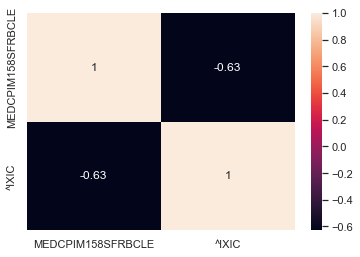

shift: -1    corr: -0.6297801563120214


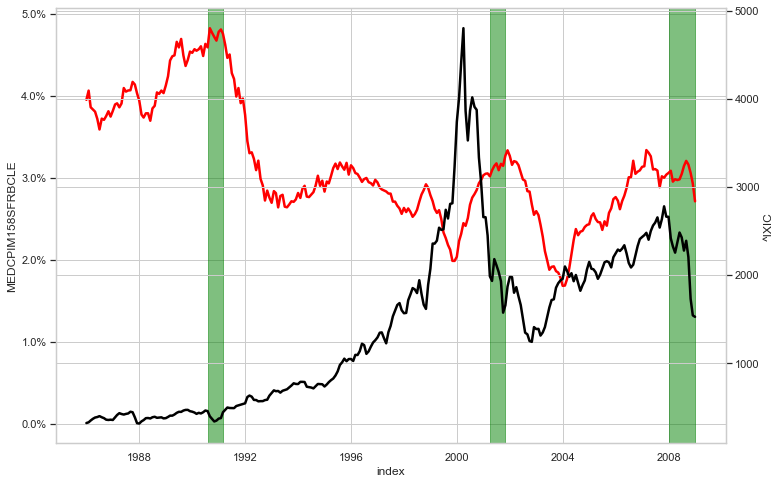

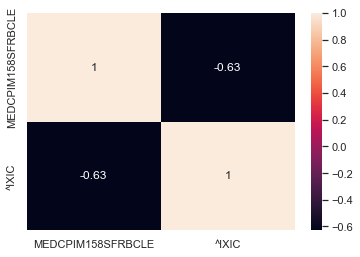

shift: 0    corr: -0.6297801563120214


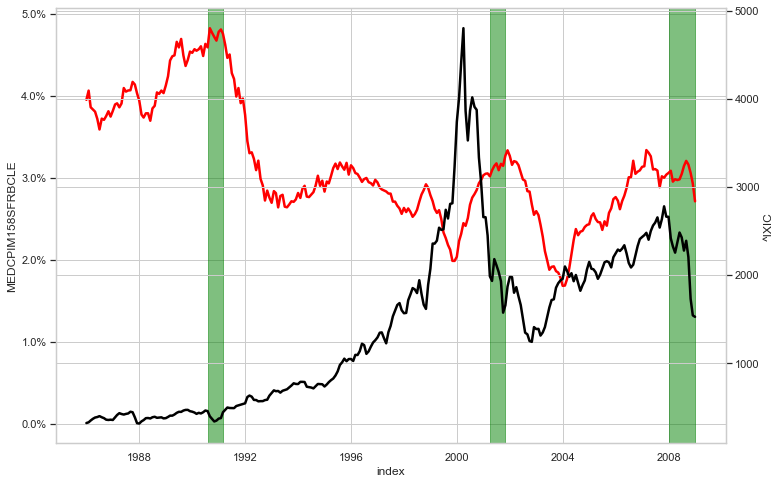

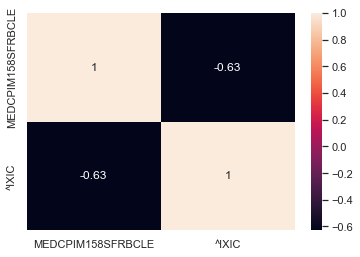

shift: 1    corr: -0.6297801563120214


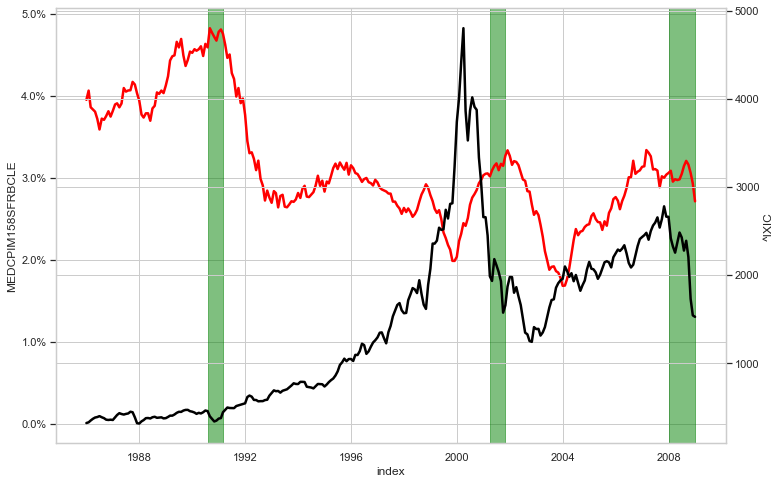

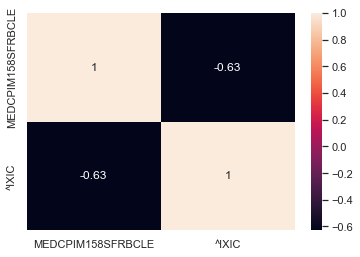

shift: 2    corr: -0.6297801563120214
shift: -1.0    corr: 0.08158483124563551


In [39]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(-3, 3, 1):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

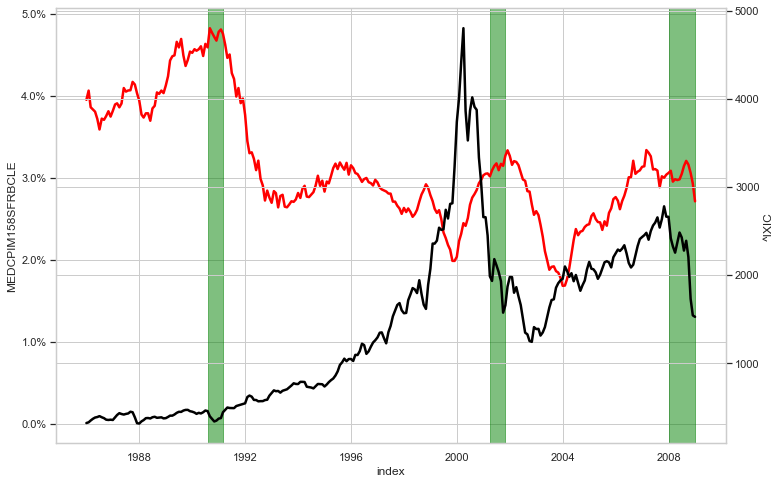

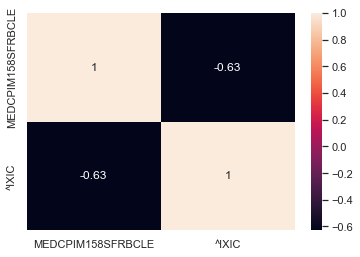

shift: 0    corr: -0.6297801563120214
shift: -1.0    corr: 0.08158483124563551


In [40]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

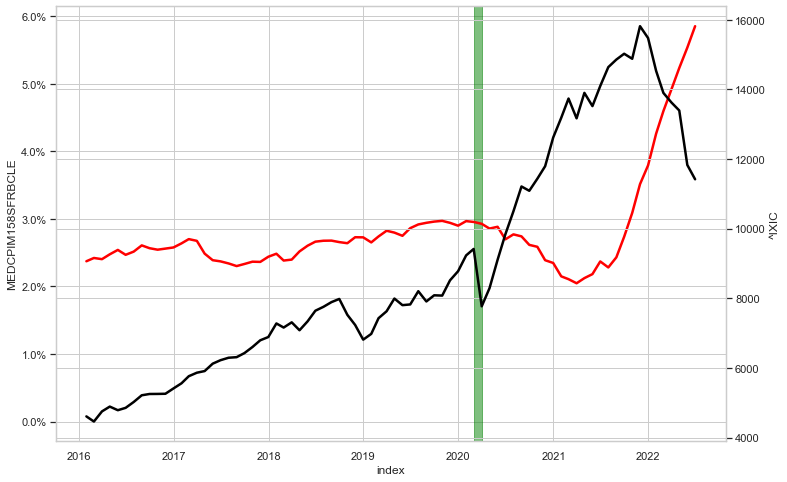

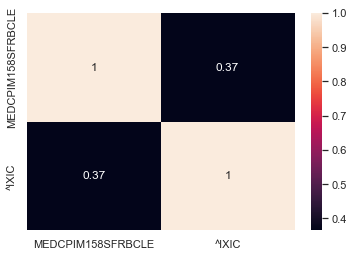

shift: 0    corr: 0.3654379378821512
shift: 0    corr: 0.3654379378821512


In [41]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2027/01/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='2016-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

# FED vs IXIC

(            FEDFUNDS
 index               
 1985-01-31      8.35
 1985-02-28      8.50
 1985-03-31      8.58
 1985-04-30      8.27
 1985-05-31      7.97,
             FEDFUNDS
 index               
 2022-02-28      0.08
 2022-03-31      0.20
 2022-04-30      0.33
 2022-05-31      0.77
 2022-06-30      1.21,
 (450, 1))

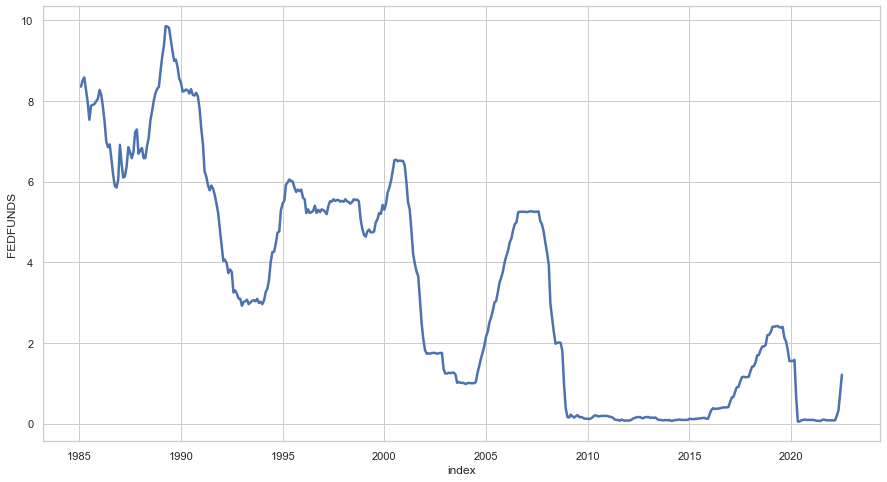

In [34]:
plt.figure(figsize=(15, 8))
ticker = 'FEDFUNDS'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'

FEDFUNDSRate_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
FEDFUNDSRate_df['index']= FEDFUNDSRate_df.index
FEDFUNDSRate_df = FEDFUNDSRate_df.groupby(pd.Grouper(key='index', freq='M')).mean()

FEDFUNDSRate_df_save = FEDFUNDSRate_df

sns.lineplot(x='index', y=FEDFUNDSRate_df.columns[0], data=FEDFUNDSRate_df,palette="tab10", linewidth=2.5)
FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail(), FEDFUNDSRate_df.shape

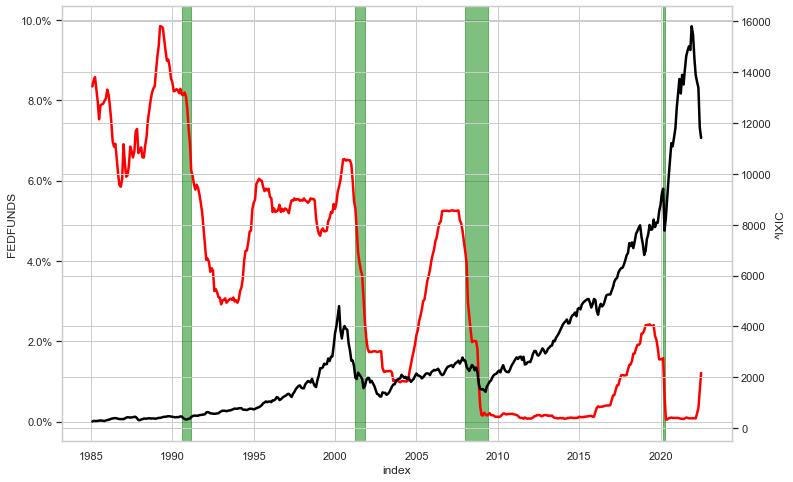

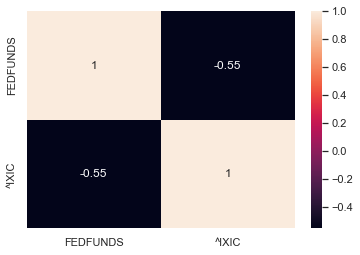

shift: -12    corr: -0.5534178612527889


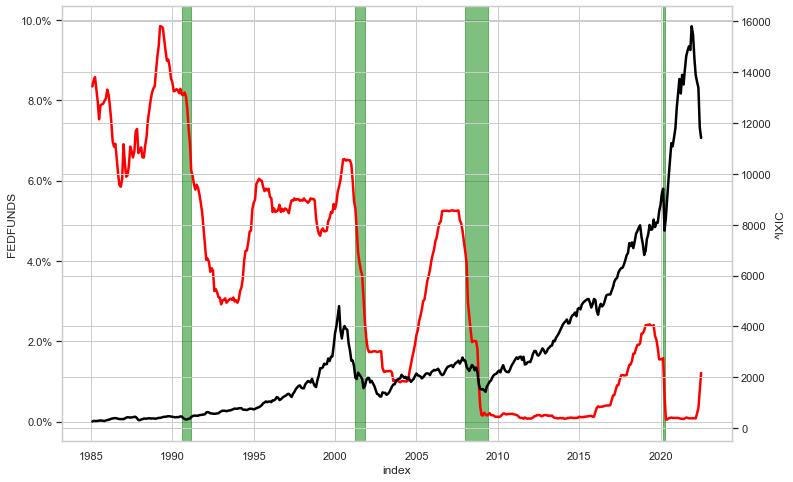

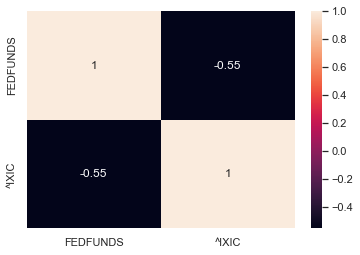

shift: -9    corr: -0.5534178612527889


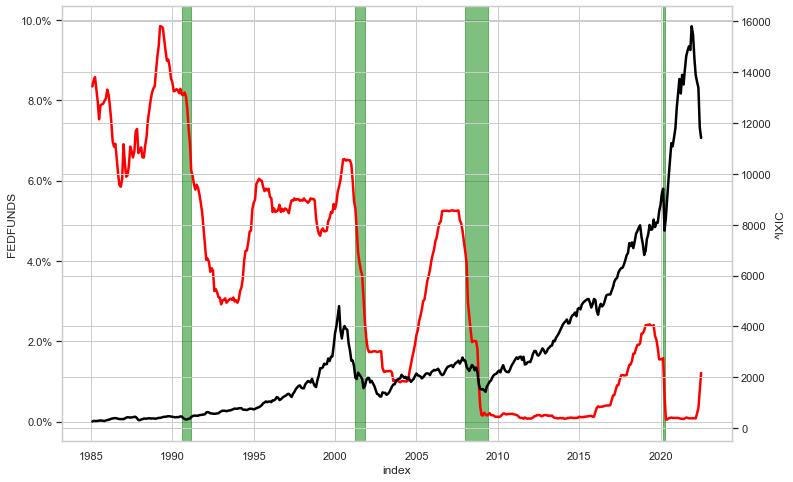

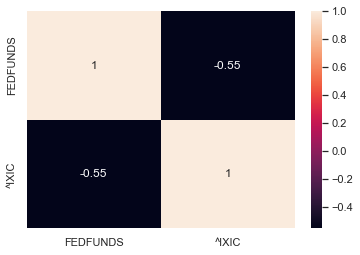

shift: -6    corr: -0.5534178612527889


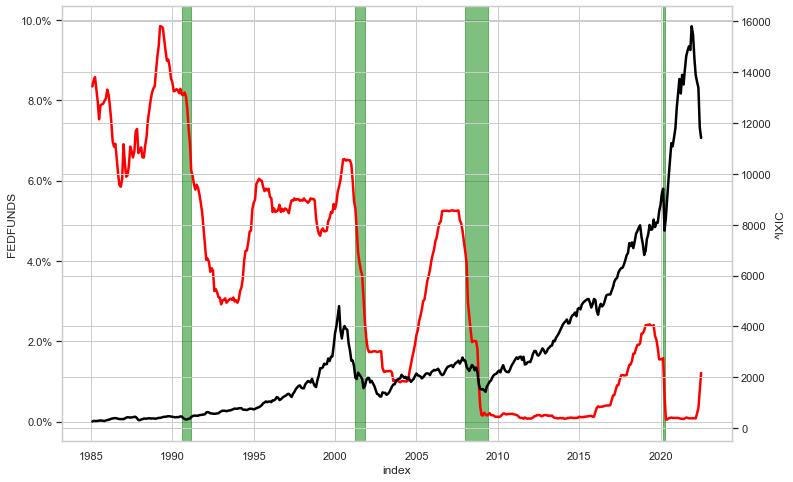

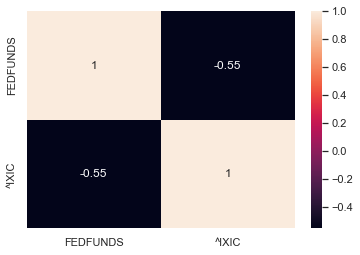

shift: -3    corr: -0.5534178612527889


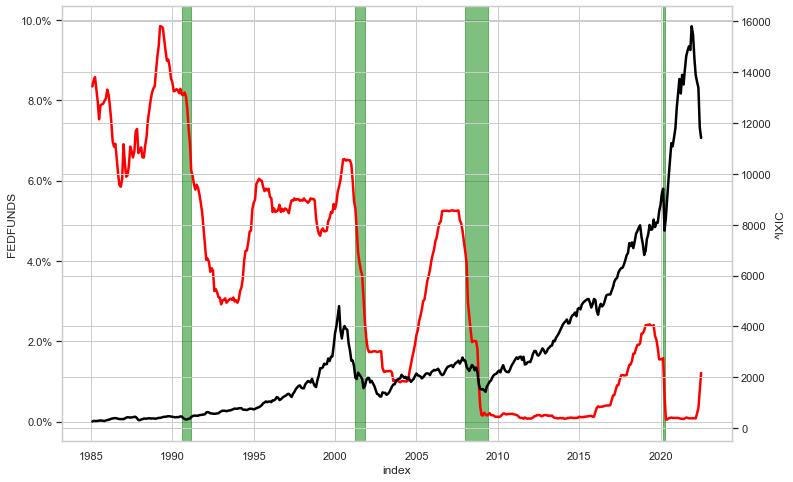

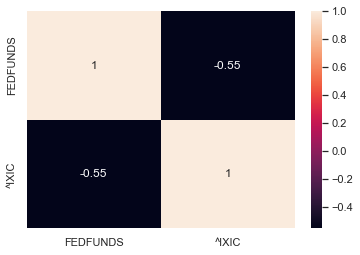

shift: 0    corr: -0.5534178612527889


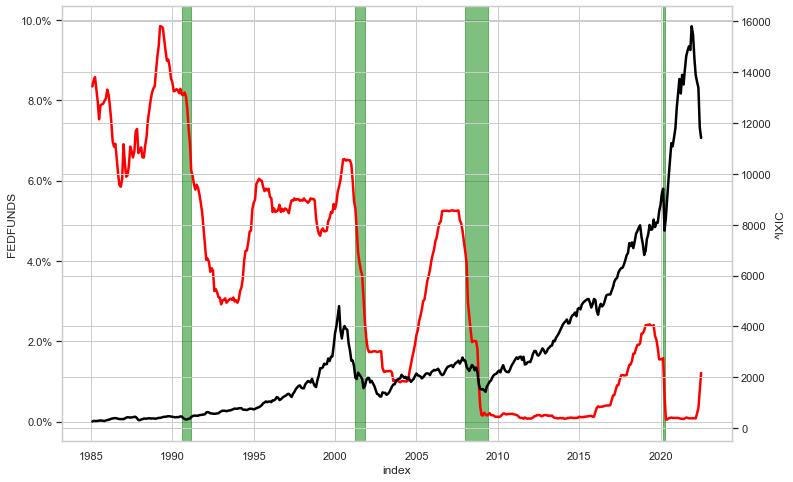

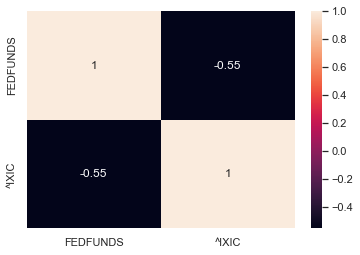

shift: 3    corr: -0.5534178612527889


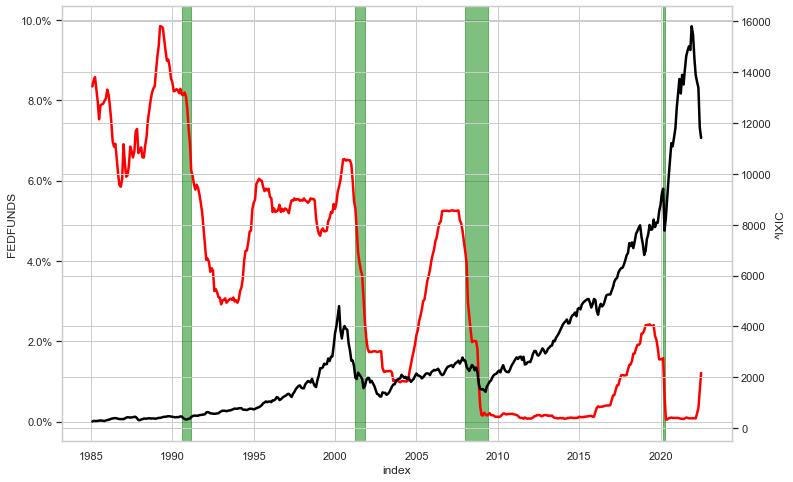

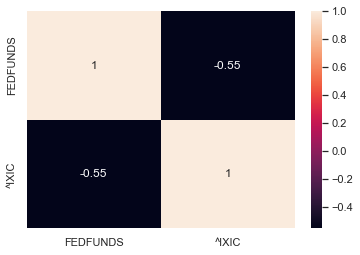

shift: 6    corr: -0.5534178612527889


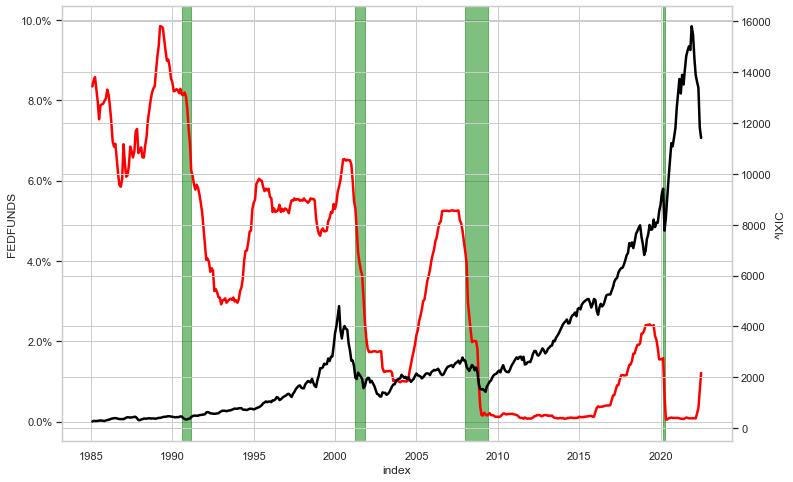

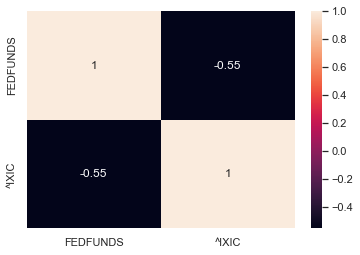

shift: 9    corr: -0.5534178612527889
shift: -9 -12    corr: -0.5534178612527889 -0.5534178612527889


In [35]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(-12, 12, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)

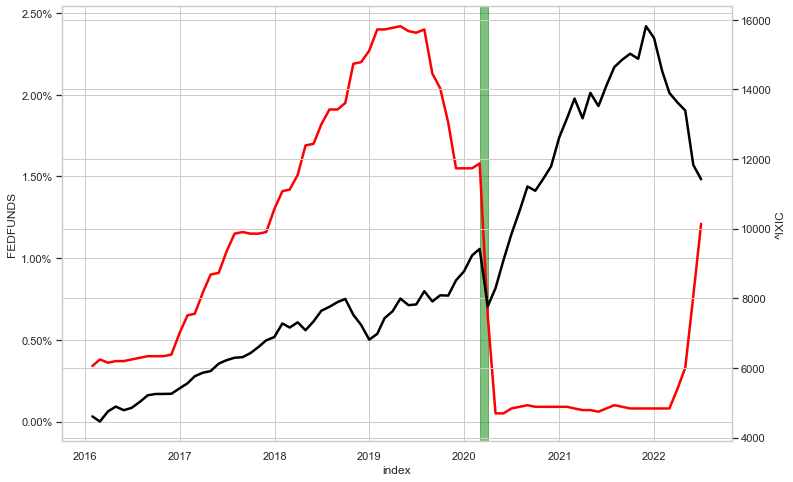

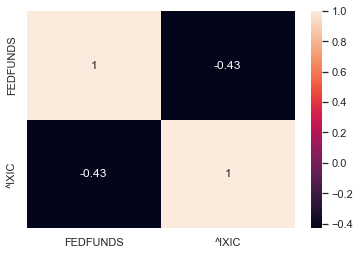

shift: 0    corr: -0.4310794789860181
shift: 0 0    corr: -0.4310794789860181 1


In [36]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, Stock_df,  shift__= 0, bottom_year='2016-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)